In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.special import factorial

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

In [62]:
def headRatio(N,p=0.5):   #return the ratio of heads out of N flips,
    heads = 0             # with p chance of success
    for i in range(0,N):
        flips = np.random.sample()
        if flips <= p:
            heads += 1
    return heads/N         

def headRatioPlot(N,p=0.5): #plots the ratio of heads out of n flips,
    heads = np.zeros(N)     #with p chance of success, as n approaches
    for i in range(0,N):    #N
        flips = np.random.sample()
        if flips <= p:
            heads[i:len(heads)] += 1
        heads[i]/=i+1
    plt.plot(np.arange(N),p*np.ones(N),color = "black")
    plt.plot(np.arange(N),heads)
    return

At N = 20:  0.6
At N = 1000:  0.512
At N = 1,000,000:  0.500135
The actual value of p is 0.5


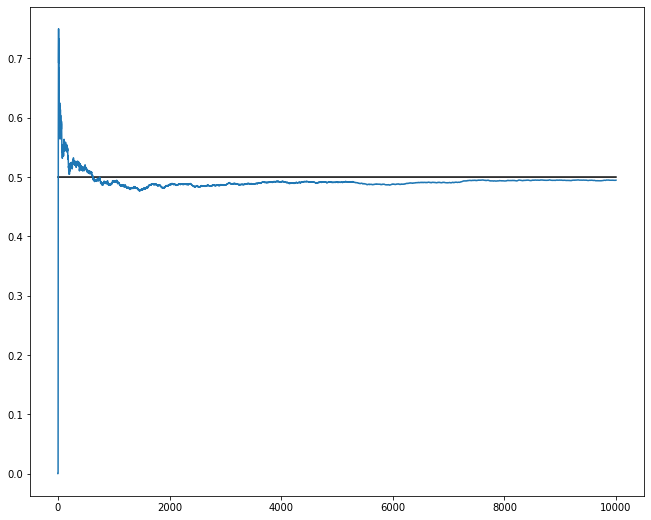

In [63]:
print("At N = 20: ", headRatio(20))
print("At N = 1000: ", headRatio(1000))
print("At N = 1,000,000: ", headRatio(1000000))
print("The actual value of p is 0.5")
headRatioPlot(10000)

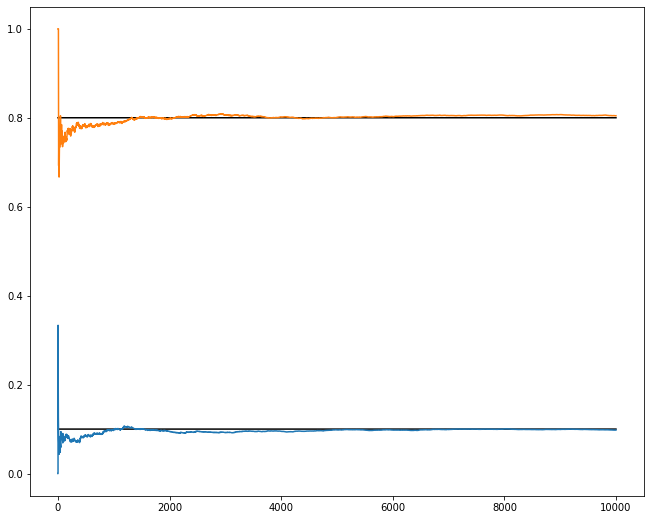

In [64]:
headRatioPlot(10000,0.1)
headRatioPlot(10000,0.8)

In [6]:
def PNx(N,p=0.5): #uses a binomial distribution to find odds of getting 
                  #each number of heads out of N
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))
        *((p)**x)*((1-p)**(N-x))
    return PNx

def binomHist (N,p=0.5): #creates a histirgam and line overlay of a 
                         #binomial distribtution
    plt.bar(np.arange(N+1),PNx(N,p))
    plt.plot(np.arange(N+1),PNx(N,p),color='red')
    return 'This plot was derived from the binomial distrobution'

In [66]:
def flipChance (N,x,m=200): #Flips N number of coins and returns chance 
                            #fo getting x heads with m trials
    n = 0             #Numbes of Successes, counts up from 0
    for i in range(0,m):
        flips = np.random.randint(2, size=N) 
        if (len(flips[np.where(flips==1)]) == x):  
                n += 1  
    return n/m

def flipTally(N,m=100,p=0.5): #Return array showing number of heads from 
                              #0-N,with a p chance of success over m trials
    n = 0 #Numbes of Successes
    headTally = np.zeros(N+1)
    attempts = np.zeros(N)
    for i in range(0,m):
        for j in range(0,N):
            attempts[j] = np.random.sample()
        headTally[len(attempts[np.where(attempts<=p)])] += 1
    return headTally

def coinHist(N,m,p=0.5):        #creates histogram of distribution of coin 
                                 #flips with a binomial line overlay
    counts =  flipTally(N,m,p)   
    plt.bar(np.arange(N+1),counts/m)
    plt.plot(np.arange(N+1),PNx(N,p),color='red')
    return N, 'coins were flipped',m,'times to create the plot:'

(20, 'coins were flipped', 10000, 'times to create the plot:')


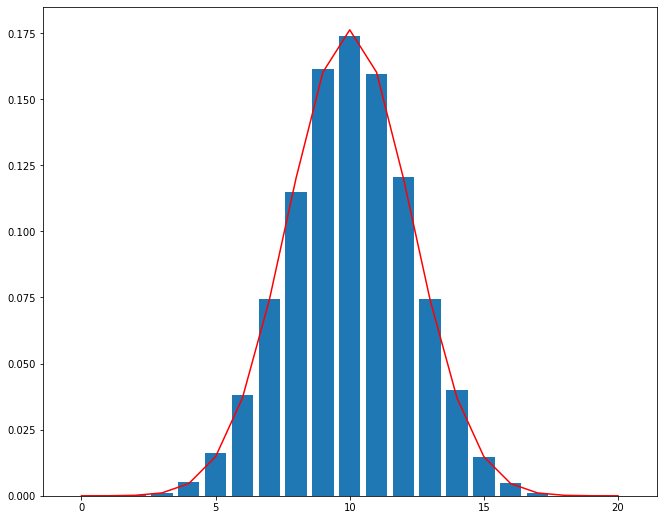

In [7]:
print(coinHist(20,10000))

(20, 'coins were flipped', 10000, 'times to create the plot:')


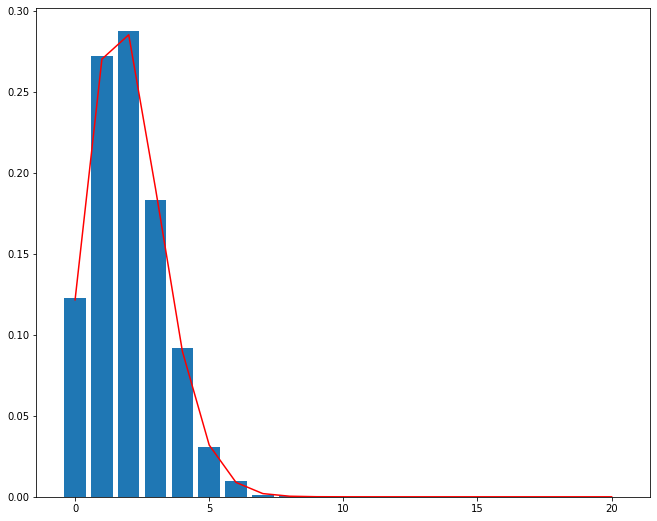

In [67]:
print(coinHist(20,10000,0.1))

'This plot was derived mathematically from the binomial distrobution'

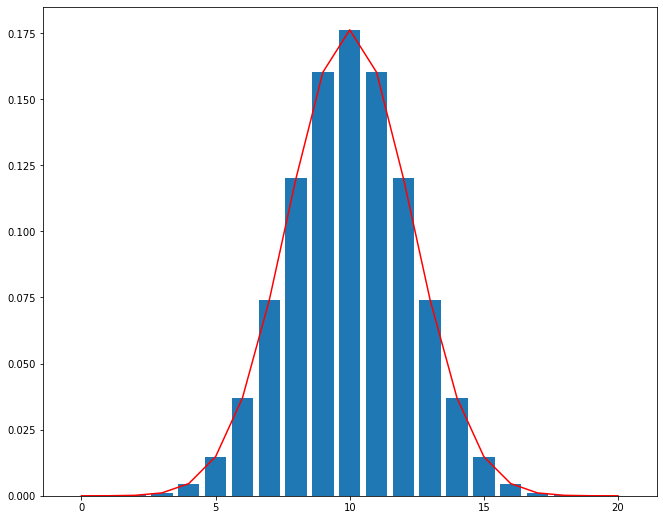

In [68]:
binomHist(20)

In [78]:
def poisson(R,mu=5): #creates an array showing probability of getting
                     #n amounts of heads out of N
    r=(np.arange(R))
    poisson=(mu**r)*np.exp(-1*mu)/factorial(r)
    return poisson

def poissonPlot(N,p): #creates a plot showing the distribution from
                      #the poisson function
    mu = p*N
    plt.plot(np.arange(N+1), poisson(N+1,mu), color = "purple")
    return 'Poissoin distribution with mu =', mu
    
def pdfCompare(N,m=1000,p=0.5): #compares the ditribution of the simulated
                                #coin flips, binomial distribution, and
    poissonPlot(N,p)            #poisson distribution       
    coinHist(N,m,p)
    return "poisson is purple, binomial is red, p =", p

('poisson is purple, binomial is red, p =', 0.1)

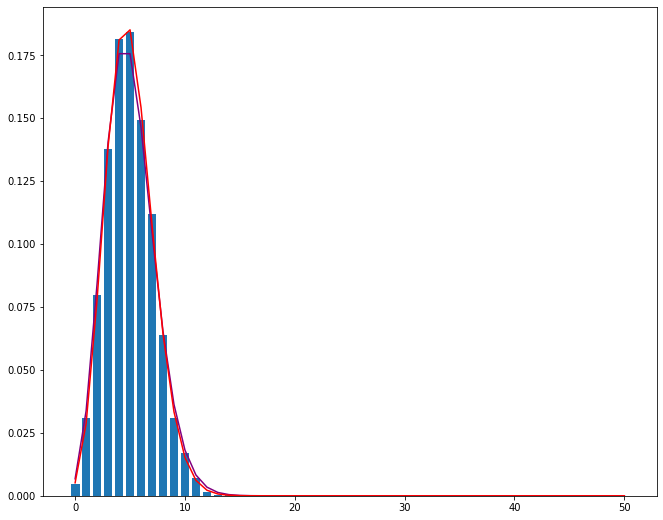

In [79]:
 pdfCompare(50,10000,0.1)

('poisson is purple, binomial is red, p =', 0.5)

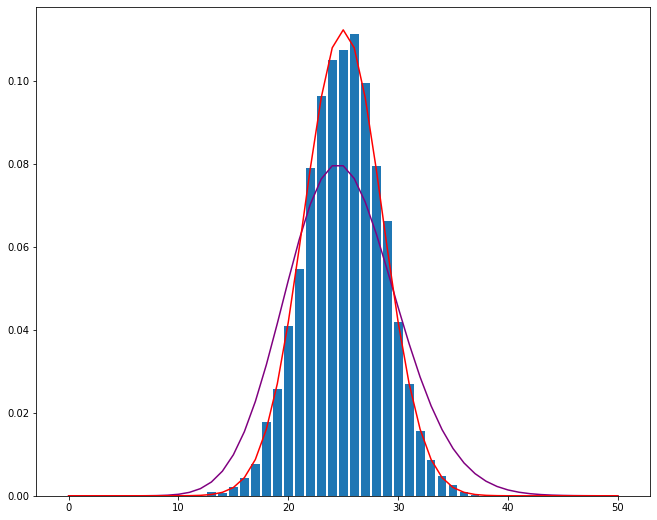

In [80]:
pdfCompare(50,10000,0.5)

In [272]:
#Finds the varience of the a simulated data set: m sets of N coins with p
#chance of heads. Will verify var=<(x-<x>)^2>=<x^2>-<x>^2 if prove=True
def var(N=20,m=10000,p=0.1,prove=False):
    flips = flipTally(N,m,p)/m
    avg = np.average(np.arange(N+1),weights=flips)
    var = np.average((np.arange(N+1)-avg)**2,weights=flips)
    if prove:
        var2 = np.average(np.arange(N+1)**2,weights=flips)-avg**2    
        return """The statement "The two variance equations are \
equivalent" is""",np.round(var,10)==np.round(var2,10)
    return var,avg

#Plots the varience and average of a simulation as the p value increases
#over the range pMin to pMax
def varPlot(N=20,m=100,pMin=0.05,pMax=0.25,steps=20):
    p=np.linspace(pMin,pMax,steps)
    v,avg = np.zeros(steps)
    for i in range(0,steps):
        v[i],avg[i] = var(N,m,p[i])
    plt.plot(p,v)
    plt.plot(p,avg,color = "red")
    return

In [273]:
print(pVar(prove=True),"\n",pVar())

('The statement "The two variance equations are equivalent" is', True) 
 (2.0796, 2.02)


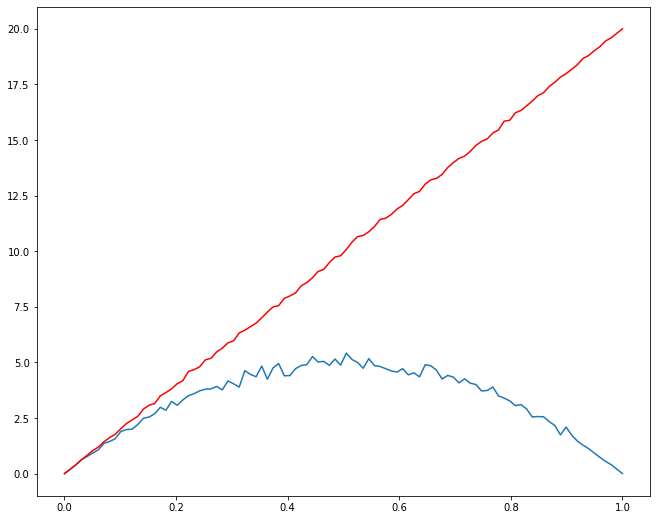

In [275]:
pVarPlot(pMin=0, pMax=1, steps=100, m=1000)